# Machine Learning: Workshop 2

<b>Joraaver Chahal
<br />October 26 2015</b>


### Quick Review

What is supervised learning?

<span style ="font-size: 1.2em">Supervised learning can be done when the <b>data provided already has labels</b> attached to each sample.</span> <br>

<span style ="font-size: 1.2em">Used for <b>predicting</b> the label of a new sample or data point</span>

### Then what is unsupervised learning?

<span style ="font-size: 1.2em">Unsupervised learning is done when the <b>data is completely unlabeled</b></span>

<span style ="font-size: 1.2em">Used for <b>finding</b> some kind of grouping for the samples, and then <b>predicting</b> a new sample </span>

## Clustering

The technique for finding out how many classes exist in a dataset along with what class to assign each sample.

### Centroid-based Clustering

+ Involves finding the "center" of the clusters.
    + Not necessarily a sample from the dataset.

#### K-Means Clustering

+ Pick how many clusters the data set will have (or use an algorithm to calculate this number)
+ Pick a sample point as a starting point for each of the clusters. Known as the center of the class.
+ Data points get assigned to the closest center.
+ Center readjusts based on average of all the points in its cluster.
+ Repeat data point assignment until two iterations pass with no changes to points.



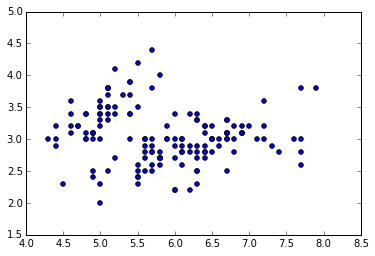

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1]);

In [81]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


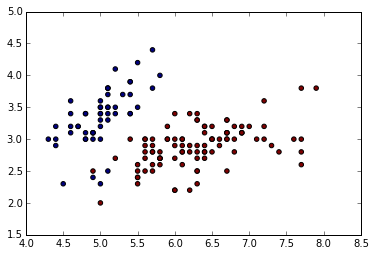

In [102]:
from sklearn.cluster import KMeans

# Trying a clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

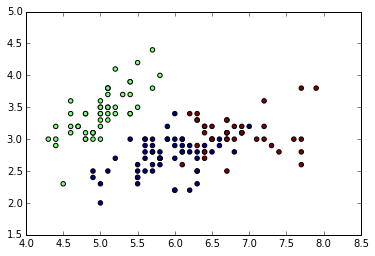

In [103]:
# Correct number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_);

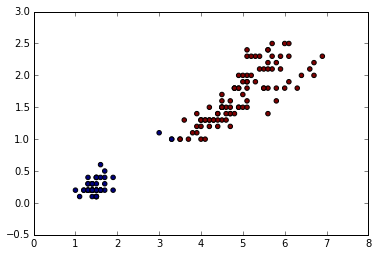

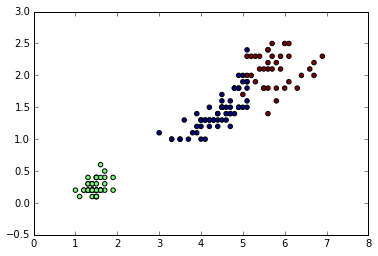

In [87]:
#To drive the point home
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

plt.figure(1)
plt.scatter(X[:,2],X[:,3],c=kmeans.labels_)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

plt.figure(2)
plt.scatter(X[:,2],X[:,3],c=kmeans.labels_)

In [ ]:
To predict what cluster a sample belongs to, use `predict`

In [101]:
print(kmeans.predict(X[0,:]))
print(X[0,:])
print(kmeans.labels_)

[1]
[ 5.1  3.5  1.4  0.2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


What's the problem with this clustering algorithm?

<b>You still have to tell it how many clusters to try </b>.

This, however, can be fixed via several methods. One such method is the [elbow method](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_Elbow_Method)

### Hierarchical Clustering

+ Agglomerative Clustering: "bottom-up" approach.
    + Each observation is it's own cluster, and it combines observations to build up clusters
+ Divisve Clustering: "top-down" approach.
    + The entire sample space is one cluster. Recursively break down the cluster into smaller groups.
+ Uses a "linkage" metric, often Euclidean distance, to base decisions on the acceptance of a sample point into a cluster
    
Generally, [not good](https://en.wikipedia.org/wiki/Hierarchical_clustering) for large datasets

### Density-based Clustering

+ As its name suggests, clustering is based on <b>density</b>
+ Good for finding non-linearly separated clusters

#### DBSCAN

Look at [this](http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) cool demo!

Anyone know what's going on?

+ Uses an ε-based neighborhood for discovering points
+ Needs n-minimum points in the neighborhood to consider them "part" of the cluster

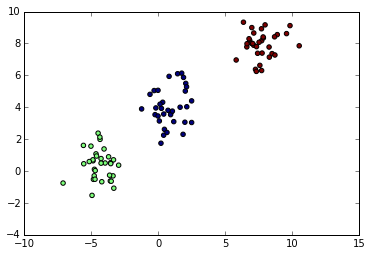

In [47]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=3)

plt.scatter(X[:,0],X[:,1],c=y)

#### This you willl try on your own

4 steps to follow:

1) Import DBSCAN from sklearn.cluster

2) Create a model from DBSCAN, with epsilon =  1 and min_samples = 5

3) Fit the model on X

4) Plot your models results, using `db.labels_` as the coloring.

In [105]:
# import DBSCAN

# create model (use help(DBSCAN) to guide you on how to 
# create the model with just epsilon and min_samples)

# fit the model 

# plot the model

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Help on class DBSCAN in module sklearn.cluster.dbscan_:

class DBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Parameters
 |  ----------
 |  eps : float, optional
 |      The maximum distance between two samples for them to be considered
 |      as in the same neighborhood.
 |  min_samples : int, optional
 |      The number of samples (or total weight) in a neighborhood for a point
 |    

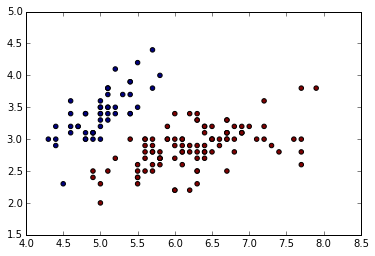

In [104]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 1, min_samples=5)
db.fit(X)

print(db.labels_)

plt.scatter(X[:,0],X[:,1],c=db.labels_)

#### How important are each of the features?

## Principle Component Analysis

PCA, in short

Involves figuring out what features account for most of the variance in the dataset.

+ Matters much more for larger dimensional datasets (4+)

#### Why?

### Curse of Dimensionality

+ As dimensions explode in number, the data becomes extremely sparse. 
+ To algorithms, the samples may not look related to each other at all due to how sparse they are.

We'll look at the iris dataset, without knowledge of the labels!

(150, 2)


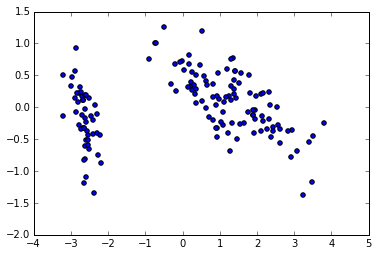

In [23]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()

# Try and reduce the number of features to 2
pca = PCA(n_components=2) 
pca.fit(iris.data)
X = pca.transform(iris.data)

plt.figure(1)
plt.scatter(X[:,0],X[:,1])

What this has done is given us a new data set, with only two features instead of four.

But what are the two features?

In [45]:
print(pca.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]


PCA finds the best combination of features that explains the variance.

+ Here, on the x-axis, it's petal length that determines the most variance. On the y-axis, a combination of sepal width and length matter the most.

It's not very clear from the graphs how this algorithm works. [Here](http://setosa.io/ev/principal-component-analysis/) is a link to understand it a little better!


## Key Points in Unsupervised Learning

Clustering is a technique used for identifiying special groupings of data points.

Reduction analysis via PCA can greatly improve understanding of dataset

+ What features are more important not only aids algorithms, but aids human understanding and insight.

## Try this!

In [64]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, n_features=3,random_state=0)

unknown = [0,10,10]

Using PCA, reduce the dataset to 2 dimensions. Then, apply DBSCAN on the data to get the clusters created by the reduced data. See the unknown sample is now in it's reduced form via <b> `pca.transform(unknown)` </b>. You may want to look at the data after you've done PCA to best pick the hyperparameters for DBSCAN.

[[-8.32978093  0.42838133]]


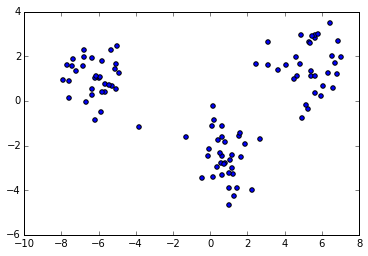

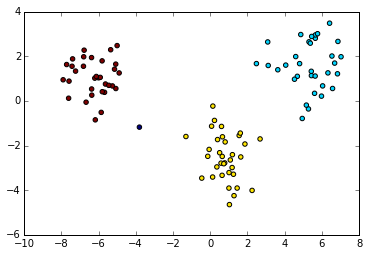

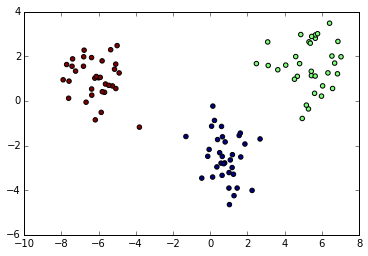

In [76]:
pca = PCA(n_components=2)  
pca.fit(X)
X_red = pca.transform(X)

db = DBSCAN(eps = 2, min_samples =4)
db.fit(X_red)

print(pca.transform(unknown))

# Plot of reduced X, with no cluster colors
plt.figure(1)
plt.scatter(X_red[:,0],X_red[:,1])

# Plot of reduced X, with DBSCAN's labeling
plt.figure(2)
plt.scatter(X_red[:,0],X_red[:,1],c=db.labels_)

# Plot of reduced X, with actual clustering
plt.figure(3)
plt.scatter(X_red[:,0],X_red[:,1],c=y)


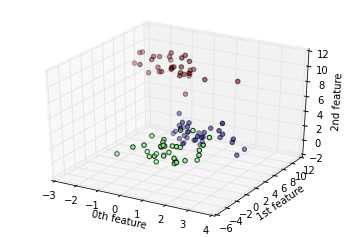

In [56]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y)
ax.set_xlabel("0th feature")
ax.set_ylabel("1st feature")
ax.set_zlabel("2nd feature")